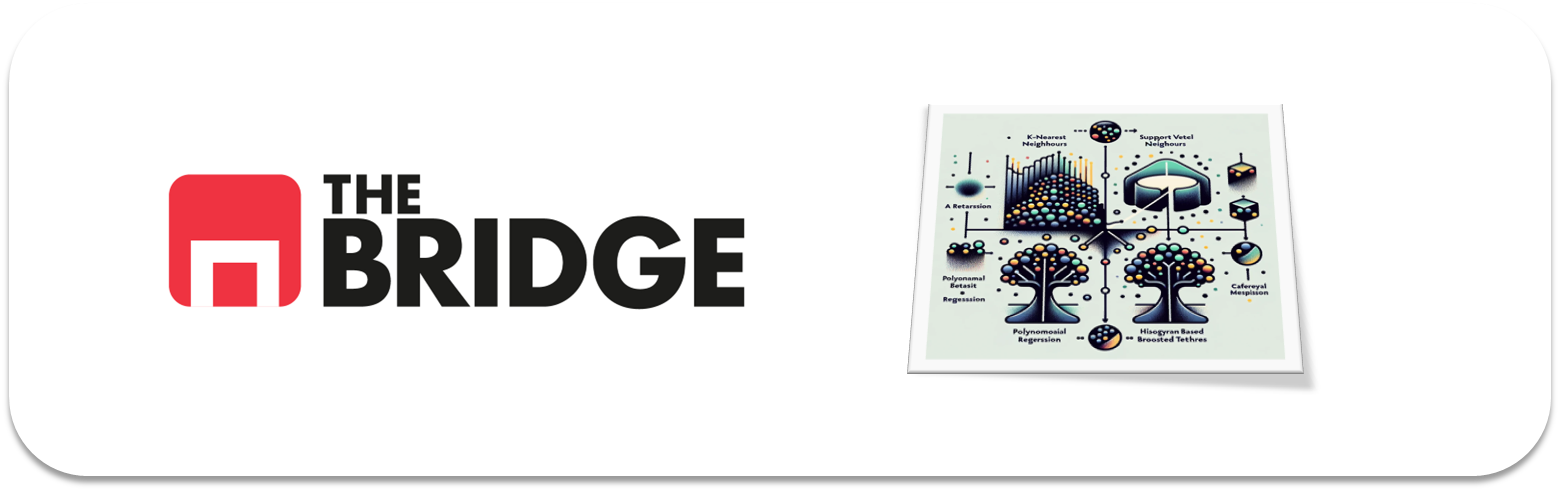

## PRACTICA OBLIGATORIA: **Repaso Aprendizaje Supervisado**

* La práctica obligatoria de esta unidad consiste en resolver sobre un mismo dataset un problema de clasificación y un problema de regresión. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error


### #1 Explicación del dataset y carga de datos

Vamos a trabajar con el dataset "Wine Quality", que es un dataset en el que se recogen diversas características fisicoquímicas de las variades tinta y blanca del "Vinho verde" portugués. Las variables del dataset se describen a continuación


1. **Acidez fija**: La mayoría de los ácidos involucrados con el vino son fijos o no volátiles (no se evaporan fácilmente).
2. **Acidez volátil**: La cantidad de ácido acético en el vino, que en niveles demasiado altos puede llevar a un sabor desagradable a vinagre.
3. **Ácido cítrico**: Encontrado en pequeñas cantidades, el ácido cítrico puede añadir 'frescura' y sabor a los vinos.
4. **Azúcar residual**: Es la cantidad de azúcar restante después de que se detiene la fermentación, es raro encontrar vinos con menos de 1 gramo/litro y vinos con más de 45 gramos/litro se consideran dulces.
5. **Cloruros**: La cantidad de sal en el vino.
6. **Dióxido de azufre libre**: La porción libre de SO2 existe en equilibrio entre el SO2 molecular (como un gas disuelto) y el ion bisulfito; previene el crecimiento microbiano y la oxidación del vino.
7. **Dióxido de azufre total**: Es la cantidad de formas libres y ligadas de S02; en bajas concentraciones, el SO2 es en su mayoría indetectable en el vino, pero en concentraciones libres de más de 50 ppm, el SO2 se hace evidente en la nariz y el sabor del vino.
8. **Densidad**: La densidad del vino es cercana a la del agua dependiendo del porcentaje de alcohol y contenido de azúcar.
9. **pH**: Describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos están entre 3-4 en la escala de pH.
10. **Sulfatos**: Un aditivo del vino que puede contribuir a los niveles de dióxido de azufre (SO2), que actúa como un antimicrobiano y antioxidante.
11. **Alcohol**: El porcentaje de contenido de alcohol del vino.
12. **Calidad**: Una variable de salida (basada en datos sensoriales, puntuación entre 0 y 10).
13. **Class**: Si es blanco o tinto.



Carga el dataset "wines_dataset.csv", muestra sus primeras filas, su información general y define dos variables target una para clasificación que permita predecir la calidad del vino según el resto de propiedas y otra variable target para regresión que permita predecir el grado alcohólico del vino a partir del resto de propiedades. 

El **objetivo de negocio en el primer problema** será anticipar la posible clasificación de sus vinos por los catadores profesionales y a partir de ahí poder planificar la producción, distribución y precio a poner a cada vino. En este sentido, el "cliente" nos dice que le gustaría poder clasificar correctamente lo mejor posible en media  (que interpretamos como el mejor recall medio posible).

El **objetivo de negocio en el segundo problema** (bastante artificial) es poder hacer simulaciones de posibles vinos futuros para saber cómo conseguir variedades más o menos alcohólicas para atender mercados diferentes. En este sentido, les interesa equivocarse lo menos posible porcentualmente sobre el grado alochólico real.

Muestra la distribución de ambos targets y haz un pequeño assesment previo de cada problema. NOTA: El dataset está limpio y sin valores faltantes.

In [4]:
df_wine = pd.read_csv('./data/wines_dataset.csv', sep='|')
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,8.5,0.21,0.26,9.25,0.034,73.0,142.0,0.99450,3.05,0.37,11.4,6,white
1,8.3,0.16,0.37,7.90,0.025,38.0,107.0,0.99306,2.93,0.37,11.9,6,white
2,6.8,0.18,0.38,1.40,0.038,35.0,111.0,0.99180,3.32,0.59,11.2,7,white
3,6.1,0.26,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,white
4,7.5,0.63,0.27,2.00,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,6,red


In [5]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  class                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [9]:
# Definir variables target
classification_target = "quality"  # Para clasificación
regression_target = "alcohol"  # Para regresión

C:\Users\PC ELITE\AppData\Local\Temp\ipykernel_4156\3121437029.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_wine, x=classification_target, palette="viridis")


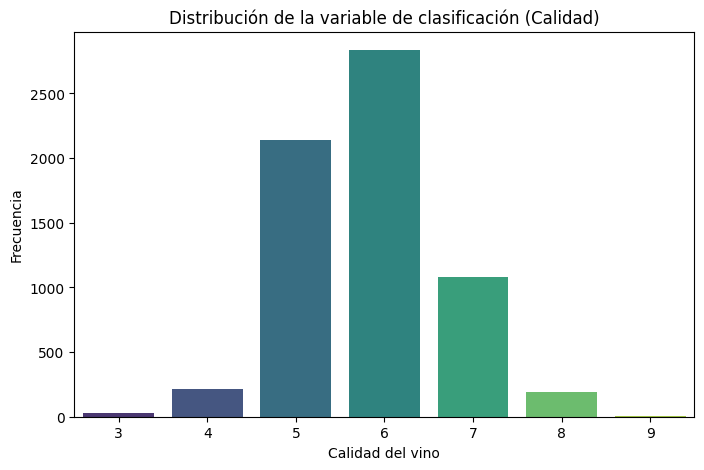

In [10]:
# Distribución de la variable objetivo para clasificación
plt.figure(figsize=(8, 5))
sns.countplot(data=df_wine, x=classification_target, palette="viridis")
plt.title("Distribución de la variable de clasificación (Calidad)")
plt.xlabel("Calidad del vino")
plt.ylabel("Frecuencia")
plt.show()

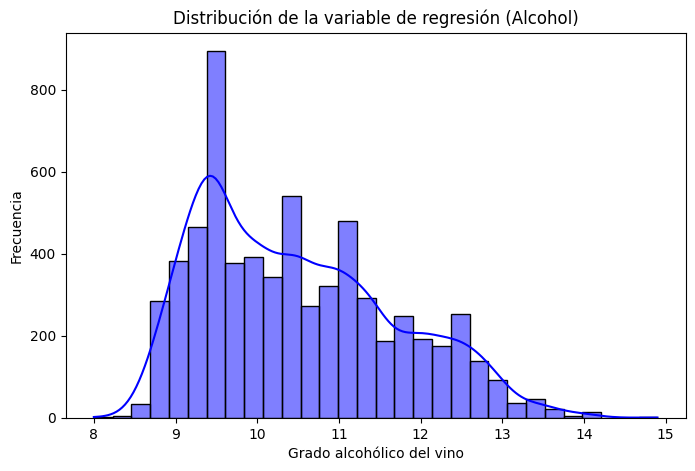

In [11]:
# Distribución de la variable objetivo para regresión
plt.figure(figsize=(8, 5))
sns.histplot(df_wine[regression_target], bins=30, kde=True, color="blue")
plt.title("Distribución de la variable de regresión (Alcohol)")
plt.xlabel("Grado alcohólico del vino")
plt.ylabel("Frecuencia")
plt.show()

**Evaluación inicial de cada problema**

*Problema de clasificación (Calidad del vino):*
* Objetivo: Maximizar el recall medio para clasificar correctamente los vinos según su calidad.
* Posible desafío: Desbalance en la distribución de clases que afecte el rendimiento del modelo.

*Problema de regresión (Grado alcohólico del vino):*
- Objetivo: Minimizar el error porcentual sobre el grado alcohólico real.
- Posible desafío: Presencia de sesgo en la distribución que pueda afectar la predicción precisa.

### #2 Modelado para clasificación

Crea un modelo que permita clasificar lo mejor posible los vinos en función de su calidad, o dicho de otro modo que prediga de la mejor manera posible la calidad de un vino a partir de sus propiedades químicas. ***Considéralo un problema de clasificación***, donde los valores de calidad son las clases a predecir. Puedes utilizar los modelos que creas conveniente, al menos tres, y utiliza un KNN como modelo baseline, prueba al menos con 2 valores de K. Intenta mejorar el "recall medio" con las técnicas que creas conveniente. Compara los modelos utilizando validación cruzada con o sin optimización previa de hiperparámetros (aunque en la sesión en vivo por limitación de tiempos sólo lo haremos con validación cruzada). El modelo elegido si tiene que tener un ejemplo de optimización de parámetros.

Evalúa el modelo, analiza los errores y propón algún mecanismo de mejora aunque sea sólo un esbozo.

In [14]:
# Dividir el dataset en conjuntos de entrenamiento y prueba
X = df_wine.drop(columns=[classification_target, regression_target, 'class'])
y = df_wine[classification_target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [15]:
# Definir los modelos
models = {
    'KNN (k=3)': KNeighborsClassifier(n_neighbors=3),
    'KNN (k=5)': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}


In [16]:

# Evaluar los modelos utilizando validación cruzada
for name, model in models.items():
    pipeline = Pipeline([('scaler', StandardScaler()), ('classifier', model)])
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='recall_macro')
    print(f'{name} - Recall medio: {scores.mean():.4f}')


KNN (k=3) - Recall medio: 0.2826
KNN (k=5) - Recall medio: 0.2575
Random Forest - Recall medio: 0.3307
SVM - Recall medio: 0.2240


In [17]:
# Optimización de hiperparámetros para el modelo elegido (Random Forest en este caso)
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5]
}

pipeline = Pipeline([('scaler', StandardScaler()), ('classifier', RandomForestClassifier(random_state=42))])
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='recall_macro')
grid_search.fit(X_train, y_train)

print(f'Mejor modelo: {grid_search.best_params_}')
print(f'Mejor recall medio: {grid_search.best_score_:.4f}')


Mejor modelo: {'classifier__max_depth': 20, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
Mejor recall medio: 0.3323


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.75      0.14      0.24        43
           5       0.71      0.72      0.72       432
           6       0.66      0.76      0.70       562
           7       0.69      0.58      0.63       210
           8       0.92      0.49      0.64        47

    accuracy                           0.68      1300
   macro avg       0.62      0.45      0.49      1300
weighted avg       0.69      0.68      0.68      1300



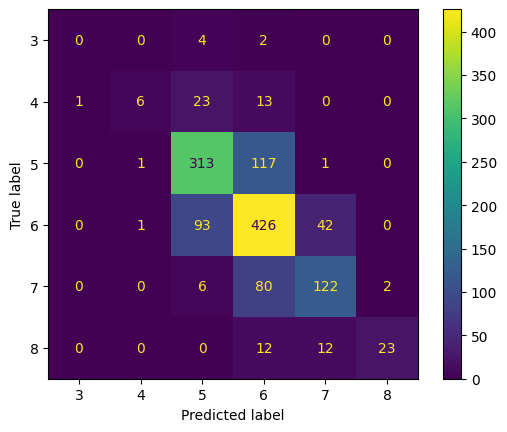

In [18]:
# Evaluar el modelo final en el conjunto de prueba
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

# Análisis de errores
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)
plt.show()

### #3 Modelado para regresión

Reutiliza todo lo que puedas la preparación del modelado de la parte anterior y construye ahora el mejor modelo que puedas para predecir el grado alcohólico de un vino dadas sus características fisico químicas, su clase y la puntuación de calidad que le ha sido otorgada. Compara al menos tres tipos de modelos, seleccionando una métrica adecuada de comparación y escoge el más apropiado empleando validación cruzada antes o después de optimizar hiperparámetros (en la sesión en vivo lo haremos antes por cuestiones de tiempo). Evalúa el modelo escogido y con los hiperparámetros ajustados de la mejor manera que puedas. Para terminar realizar un pequeño análisis de errores.

In [25]:
# Dividir el dataset en conjuntos de entrenamiento y prueba
X_reg = df_wine.drop(columns=[classification_target, regression_target, 'class'])
y_reg = df_wine[regression_target]
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)


In [26]:
# Escalar las características
scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg, )
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

In [27]:
# Definir los modelos
reg_models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'SVR': SVR()
}

In [28]:

# Evaluar los modelos utilizando validación cruzada
for name, model in reg_models.items():
    pipeline_reg = Pipeline([('scaler', StandardScaler()), ('regressor', model)])
    scores = cross_val_score(pipeline_reg, X_train_reg, y_train_reg, cv=5, scoring='neg_mean_absolute_error')
    print(f'{name} - MAE medio: {-scores.mean():.4f}')


Linear Regression - MAE medio: 0.3994
Random Forest - MAE medio: 0.2882
SVR - MAE medio: 0.2987


In [29]:
# Optimización de hiperparámetros para el modelo elegido (Random Forest en este caso)
param_grid_reg = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5]
}

pipeline_reg = Pipeline([('scaler', StandardScaler()), ('regressor', RandomForestRegressor(random_state=42))])
grid_search_reg = GridSearchCV(pipeline_reg, param_grid_reg, cv=5, scoring='neg_mean_absolute_error')
grid_search_reg.fit(X_train_reg, y_train_reg)

print(f'Mejor modelo: {grid_search_reg.best_params_}')
print(f'Mejor MAE medio: {-grid_search_reg.best_score_:.4f}')


Mejor modelo: {'regressor__max_depth': None, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 200}
Mejor MAE medio: 0.2876


MAE: 0.2689
MSE: 0.1676
RMSE: 0.4094


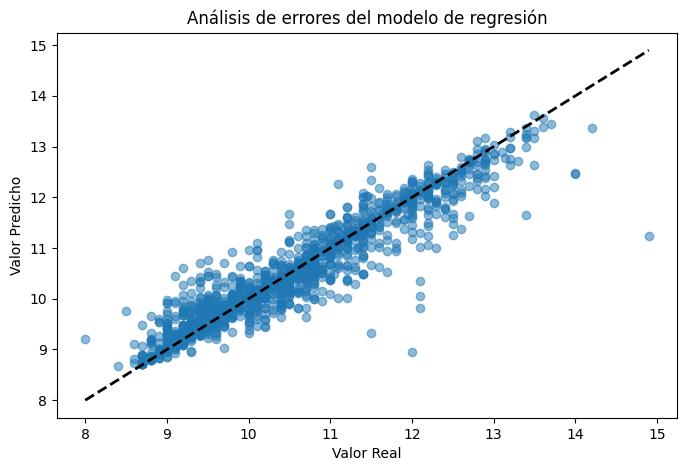

In [31]:
# Evaluar el modelo final en el conjunto de prueba
best_model_reg = grid_search_reg.best_estimator_
y_pred_reg = best_model_reg.predict(X_test_reg)
print(f'MAE: {mean_absolute_error(y_test_reg, y_pred_reg):.4f}')
print(f'MSE: {mean_squared_error(y_test_reg, y_pred_reg):.4f}')
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse:.4f}')

# Análisis de errores
plt.figure(figsize=(8, 5))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.5)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'k--', lw=2)
plt.xlabel('Valor Real')
plt.ylabel('Valor Predicho')
plt.title('Análisis de errores del modelo de regresión')
plt.show()